In [1]:
import random 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [33]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns = ["A열", "B열", "C열"])

boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.083714,-0.126882,-0.064792
std,0.960523,1.068532,0.979015
min,-2.468029,-2.383001,-2.731904
25%,-0.711213,-0.944147,-0.676383
50%,0.006088,-0.082666,-0.135398
75%,0.597101,0.615616,0.623391
max,1.934936,3.112429,2.068252


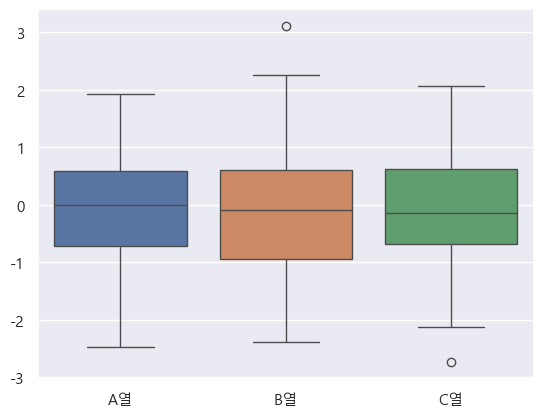

In [35]:
# 박스 플롯을 이용한 이상값 확인

sns.boxplot(data = boxdata)
plt.show()

In [37]:
# 이상값 계산하는 함수
def get_outlier(df=None, column = None, weight = 1.5) :
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [41]:
# 함수 사용해서 B열의 이상값 확인
outlier_idx = get_outlier(df = boxdata, column = 'B열', weight = 1.5)
# 이상값의 인덱스 출력
print(outlier_idx)

Index([79], dtype='int64')


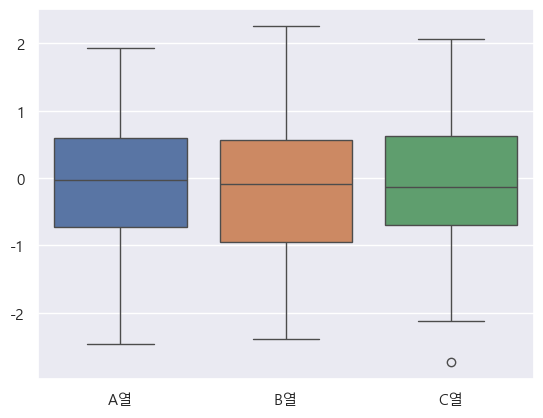

In [43]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis = 0, inplace = True)

# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()